In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

!pip install torchsummary
from torchsummary import summary

from eva.model import Net
from eva.train import train
from eva.test import test
from eva.dataloader import getMnistDataLoader
from eva.eval import fit


In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

train_loader, test_loader = getMnistDataLoader(batch_size,**kwargs)


In [9]:
kwargs = {}

vanilla_model = Net(**kwargs).to(device)
summary(vanilla_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 10, 24, 24]             900
              ReLU-4           [-1, 10, 24, 24]               0
            Conv2d-5           [-1, 10, 22, 22]             900
              ReLU-6           [-1, 10, 22, 22]               0
         AvgPool2d-7           [-1, 10, 11, 11]               0
            Conv2d-8             [-1, 10, 9, 9]             900
              ReLU-9             [-1, 10, 9, 9]               0
           Conv2d-10             [-1, 10, 7, 7]             900
             ReLU-11             [-1, 10, 7, 7]               0
        AvgPool2d-12             [-1, 10, 3, 3]               0
           Linear-13                   [-1, 10]             910
Total params: 4,600
Trainable params: 4

In [10]:
kwargs = {"normalization" : "BN"}

bn_model = Net(**kwargs).to(device)
summary(bn_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             900
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 10, 22, 22]             900
              ReLU-8           [-1, 10, 22, 22]               0
       BatchNorm2d-9           [-1, 10, 22, 22]              20
        AvgPool2d-10           [-1, 10, 11, 11]               0
           Conv2d-11             [-1, 10, 9, 9]             900
             ReLU-12             [-1, 10, 9, 9]               0
      BatchNorm2d-13             [-1, 10, 9, 9]              20
           Conv2d-14             [-1, 1

In [11]:
kwargs = {"normalization" : "LN"}

ln_model = Net(**kwargs).to(device)
summary(ln_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
         GroupNorm-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             900
              ReLU-5           [-1, 10, 24, 24]               0
         GroupNorm-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 10, 22, 22]             900
              ReLU-8           [-1, 10, 22, 22]               0
         GroupNorm-9           [-1, 10, 22, 22]              20
        AvgPool2d-10           [-1, 10, 11, 11]               0
           Conv2d-11             [-1, 10, 9, 9]             900
             ReLU-12             [-1, 10, 9, 9]               0
        GroupNorm-13             [-1, 10, 9, 9]              20
           Conv2d-14             [-1, 1

In [12]:
kwargs = {"normalization" : "GN"}

gn_model = Net(**kwargs).to(device)
summary(gn_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
         GroupNorm-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             900
              ReLU-5           [-1, 10, 24, 24]               0
         GroupNorm-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 10, 22, 22]             900
              ReLU-8           [-1, 10, 22, 22]               0
         GroupNorm-9           [-1, 10, 22, 22]              20
        AvgPool2d-10           [-1, 10, 11, 11]               0
           Conv2d-11             [-1, 10, 9, 9]             900
             ReLU-12             [-1, 10, 9, 9]               0
        GroupNorm-13             [-1, 10, 9, 9]              20
           Conv2d-14             [-1, 1

In [13]:
epochs = 25
lr = 0.01
momentum=0.9
optimizer=optim.SGD
weight_decay = 0
lambda_l1 = None

In [14]:
kwargs = {
    'device':device,
    'epochs':epochs,
    'train':train,
    'test':test,
    'train_loader':train_loader,
    'test_loader':test_loader,
    'optimizer':optimizer,
    'learning_rate':lr,
    'momentum':momentum,
    'weight_decay': weight_decay,
    'lambda_l1': lambda_l1
            }

# print("Vanilla Model")
# vanilla_output = fit(vanilla_model, **kwargs)

# torch.manual_seed(1)

# print("BatchNorm Model")
# bn_output = fit(bn_model,  **kwargs)

# torch.manual_seed(1)

# print("LayerNorm Model")
# ln_output = fit(ln_model,  **kwargs)

# torch.manual_seed(1)

# print("GroupNorm Model")
# gn_output = fit(gn_model,  **kwargs)

# torch.manual_seed(1)

# print("BatchNorm Model + L1 + L2")
# kwargs['weight_decay'] = 1e-5
# kwargs['lambda_l1'] = 0.0001
# bn_l1_l2_output = fit(bn_model,  **kwargs)

# torch.manual_seed(1)

# print("LayerNorm Model + L2")
# kwargs['weight_decay'] = 1e-5
# kwargs['lambda_l1'] = None
# ln_l2_output = fit(ln_model,  **kwargs)

# torch.manual_seed(1)

# print("GroupNorm Model + L1")
# kwargs['weight_decay'] = 0
# kwargs['lambda_l1'] = 0.0001
# gn_l1_output = fit(gn_model,  **kwargs)


In [15]:
#pip install hypothesis

  0%|          | 0/469 [00:00<?, ?it/s]

BatchNorm Model + L1 + L2
Epoch 1


loss=0.14027559757232666 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.42it/s]


Train set: Average loss: 0.0020, Accuracy: 56235/60000 (93.72%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0600, Accuracy: 9826/10000 (98.26%)

Epoch 2


loss=0.05777115374803543 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.92it/s]


Train set: Average loss: 0.0008, Accuracy: 58964/60000 (98.27%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0454, Accuracy: 9857/10000 (98.57%)

Epoch 3


loss=0.08409267663955688 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.20it/s]


Train set: Average loss: 0.0007, Accuracy: 59169/60000 (98.61%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0478, Accuracy: 9853/10000 (98.53%)

Epoch 4


loss=0.08929988741874695 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.77it/s]


Train set: Average loss: 0.0006, Accuracy: 59254/60000 (98.76%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0385, Accuracy: 9874/10000 (98.74%)

Epoch 5


loss=0.04483330622315407 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.50it/s]


Train set: Average loss: 0.0006, Accuracy: 59338/60000 (98.90%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0353, Accuracy: 9888/10000 (98.88%)

Epoch 6


loss=0.0604226291179657 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.31it/s]


Train set: Average loss: 0.0006, Accuracy: 59401/60000 (99.00%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9894/10000 (98.94%)

Epoch 7


loss=0.046893008053302765 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.50it/s]


Train set: Average loss: 0.0005, Accuracy: 59439/60000 (99.06%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9915/10000 (99.15%)

Epoch 8


loss=0.05429592356085777 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.53it/s]



Train set: Average loss: 0.0005, Accuracy: 59453/60000 (99.09%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0305, Accuracy: 9903/10000 (99.03%)

Epoch 9


loss=0.05225677788257599 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.21it/s]


Train set: Average loss: 0.0005, Accuracy: 59475/60000 (99.12%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0293, Accuracy: 9893/10000 (98.93%)

Epoch 10


loss=0.04060640186071396 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.80it/s]


Train set: Average loss: 0.0005, Accuracy: 59487/60000 (99.14%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0306, Accuracy: 9903/10000 (99.03%)

Epoch 11


loss=0.046359993517398834 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.53it/s]


Train set: Average loss: 0.0005, Accuracy: 59496/60000 (99.16%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0282, Accuracy: 9908/10000 (99.08%)

Epoch 12


loss=0.048201996833086014 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.14it/s]


Train set: Average loss: 0.0005, Accuracy: 59532/60000 (99.22%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9922/10000 (99.22%)

Epoch 13


loss=0.048688843846321106 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.25it/s]


Train set: Average loss: 0.0005, Accuracy: 59550/60000 (99.25%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 9922/10000 (99.22%)

Epoch 14


loss=0.03816051781177521 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.63it/s]


Train set: Average loss: 0.0005, Accuracy: 59575/60000 (99.29%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0299, Accuracy: 9899/10000 (98.99%)

Epoch 15


loss=0.08416303992271423 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.73it/s]


Train set: Average loss: 0.0005, Accuracy: 59559/60000 (99.27%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9912/10000 (99.12%)

Epoch 16


loss=0.03970784321427345 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.34it/s]


Train set: Average loss: 0.0005, Accuracy: 59581/60000 (99.30%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 9897/10000 (98.97%)

Epoch 17


loss=0.09621286392211914 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.72it/s]


Train set: Average loss: 0.0005, Accuracy: 59573/60000 (99.29%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9893/10000 (98.93%)

Epoch 18


loss=0.03765100985765457 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.67it/s]


Train set: Average loss: 0.0004, Accuracy: 59612/60000 (99.35%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9928/10000 (99.28%)

Epoch 19


loss=0.04205130785703659 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.37it/s]


Train set: Average loss: 0.0004, Accuracy: 59592/60000 (99.32%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0268, Accuracy: 9916/10000 (99.16%)

Epoch 20


loss=0.05555281788110733 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.18it/s]


Train set: Average loss: 0.0004, Accuracy: 59617/60000 (99.36%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9923/10000 (99.23%)

Epoch 21


loss=0.06036366522312164 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.26it/s]


Train set: Average loss: 0.0004, Accuracy: 59628/60000 (99.38%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9914/10000 (99.14%)

Epoch 22


loss=0.037135977298021317 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.96it/s]


Train set: Average loss: 0.0004, Accuracy: 59603/60000 (99.34%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 9913/10000 (99.13%)

Epoch 23


loss=0.059517160058021545 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.55it/s]



Train set: Average loss: 0.0004, Accuracy: 59639/60000 (99.40%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9922/10000 (99.22%)

Epoch 24


loss=0.04150734096765518 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.79it/s]



Train set: Average loss: 0.0004, Accuracy: 59627/60000 (99.38%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9908/10000 (99.08%)

Epoch 25


loss=0.037582892924547195 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.50it/s]


Train set: Average loss: 0.0004, Accuracy: 59611/60000 (99.35%)




Test set: Average loss: 0.0228, Accuracy: 9930/10000 (99.30%)



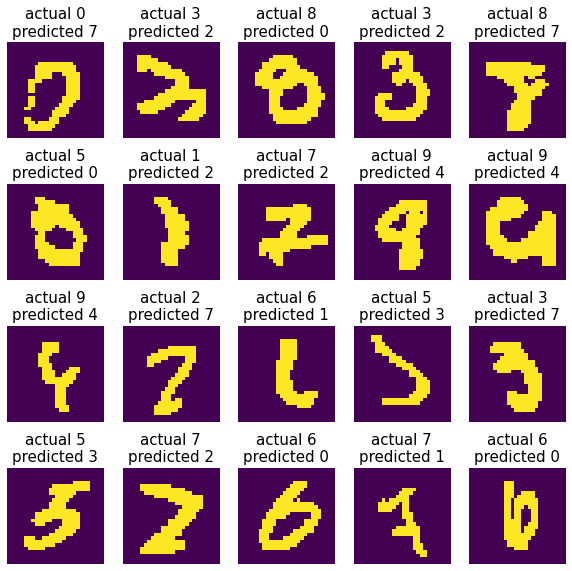

  0%|          | 0/469 [00:00<?, ?it/s]

LayerNorm Model + L2
Epoch 1


loss=0.11507325619459152 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.84it/s]


Train set: Average loss: 0.0019, Accuracy: 55808/60000 (93.01%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0686, Accuracy: 9797/10000 (97.97%)

Epoch 2


loss=0.011456199921667576 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.71it/s]


Train set: Average loss: 0.0005, Accuracy: 58788/60000 (97.98%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0441, Accuracy: 9863/10000 (98.63%)

Epoch 3


loss=0.059951093047857285 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 37.01it/s]


Train set: Average loss: 0.0004, Accuracy: 59107/60000 (98.51%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0405, Accuracy: 9889/10000 (98.89%)

Epoch 4


loss=0.051505666226148605 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.93it/s]


Train set: Average loss: 0.0003, Accuracy: 59202/60000 (98.67%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0395, Accuracy: 9872/10000 (98.72%)

Epoch 5


loss=0.019342292100191116 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.90it/s]


Train set: Average loss: 0.0003, Accuracy: 59328/60000 (98.88%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0360, Accuracy: 9893/10000 (98.93%)

Epoch 6


loss=0.00896739587187767 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 37.09it/s]


Train set: Average loss: 0.0003, Accuracy: 59382/60000 (98.97%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0325, Accuracy: 9899/10000 (98.99%)

Epoch 7


loss=0.03422100469470024 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 37.23it/s]


Train set: Average loss: 0.0002, Accuracy: 59439/60000 (99.06%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9917/10000 (99.17%)

Epoch 8


loss=0.014888479374349117 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 37.57it/s]


Train set: Average loss: 0.0002, Accuracy: 59474/60000 (99.12%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0322, Accuracy: 9897/10000 (98.97%)

Epoch 9


loss=0.0168988648802042 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.51it/s]


Train set: Average loss: 0.0002, Accuracy: 59490/60000 (99.15%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0268, Accuracy: 9917/10000 (99.17%)

Epoch 10


loss=0.015539458952844143 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.34it/s]


Train set: Average loss: 0.0002, Accuracy: 59551/60000 (99.25%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9913/10000 (99.13%)

Epoch 11


loss=0.034998733550310135 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.91it/s]



Train set: Average loss: 0.0002, Accuracy: 59532/60000 (99.22%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 9905/10000 (99.05%)

Epoch 12


loss=0.012457486242055893 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 37.15it/s]


Train set: Average loss: 0.0002, Accuracy: 59563/60000 (99.27%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9913/10000 (99.13%)

Epoch 13


loss=0.011172511614859104 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.72it/s]


Train set: Average loss: 0.0002, Accuracy: 59601/60000 (99.33%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 9924/10000 (99.24%)

Epoch 14


loss=0.004736244212836027 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.30it/s]


Train set: Average loss: 0.0002, Accuracy: 59591/60000 (99.32%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0285, Accuracy: 9913/10000 (99.13%)

Epoch 15


loss=0.024786820635199547 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 36.02it/s]


Train set: Average loss: 0.0002, Accuracy: 59623/60000 (99.37%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 9912/10000 (99.12%)

Epoch 16


loss=0.010918502695858479 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.26it/s]


Train set: Average loss: 0.0002, Accuracy: 59658/60000 (99.43%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 9923/10000 (99.23%)

Epoch 17


loss=0.04775531217455864 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.78it/s]


Train set: Average loss: 0.0001, Accuracy: 59668/60000 (99.45%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9913/10000 (99.13%)

Epoch 18


loss=0.005821589380502701 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.37it/s]


Train set: Average loss: 0.0001, Accuracy: 59654/60000 (99.42%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 9922/10000 (99.22%)

Epoch 19


loss=0.005372070241719484 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.77it/s]


Train set: Average loss: 0.0001, Accuracy: 59688/60000 (99.48%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 9928/10000 (99.28%)

Epoch 20


loss=0.003993716090917587 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.60it/s]


Train set: Average loss: 0.0001, Accuracy: 59728/60000 (99.55%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 9923/10000 (99.23%)

Epoch 21


loss=0.03007536381483078 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.95it/s]


Train set: Average loss: 0.0001, Accuracy: 59688/60000 (99.48%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9914/10000 (99.14%)

Epoch 22


loss=0.003015509806573391 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.43it/s]


Train set: Average loss: 0.0001, Accuracy: 59704/60000 (99.51%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9911/10000 (99.11%)

Epoch 23


loss=0.042447272688150406 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.13it/s]


Train set: Average loss: 0.0001, Accuracy: 59723/60000 (99.54%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9911/10000 (99.11%)

Epoch 24


loss=0.0040441700257360935 batch_id=468: 100%|██████████| 469/469 [00:12<00:00, 36.28it/s]



Train set: Average loss: 0.0001, Accuracy: 59757/60000 (99.59%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9899/10000 (98.99%)

Epoch 25


loss=0.001395625644363463 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 35.45it/s]


Train set: Average loss: 0.0001, Accuracy: 59730/60000 (99.55%)




Test set: Average loss: 0.0256, Accuracy: 9922/10000 (99.22%)



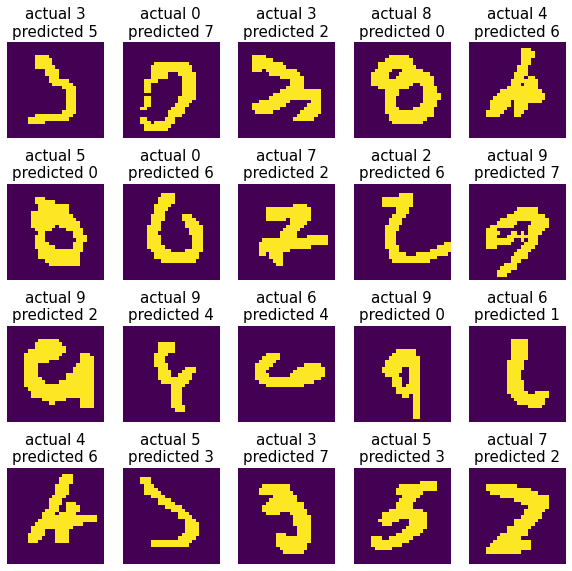

  0%|          | 0/469 [00:00<?, ?it/s]

GroupNorm Model + L1
Epoch 1


loss=0.19169394671916962 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.65it/s]


Train set: Average loss: 0.0021, Accuracy: 56208/60000 (93.68%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0728, Accuracy: 9795/10000 (97.95%)

Epoch 2


loss=0.04866510629653931 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.06it/s]


Train set: Average loss: 0.0008, Accuracy: 58831/60000 (98.05%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0541, Accuracy: 9834/10000 (98.34%)

Epoch 3


loss=0.09576994180679321 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.04it/s]


Train set: Average loss: 0.0007, Accuracy: 59098/60000 (98.50%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0473, Accuracy: 9835/10000 (98.35%)

Epoch 4


loss=0.08535240590572357 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.65it/s]


Train set: Average loss: 0.0006, Accuracy: 59168/60000 (98.61%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0424, Accuracy: 9864/10000 (98.64%)

Epoch 5


loss=0.047074656933546066 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.94it/s]


Train set: Average loss: 0.0006, Accuracy: 59284/60000 (98.81%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0397, Accuracy: 9859/10000 (98.59%)

Epoch 6


loss=0.06071905046701431 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.40it/s]


Train set: Average loss: 0.0006, Accuracy: 59337/60000 (98.89%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0400, Accuracy: 9878/10000 (98.78%)

Epoch 7


loss=0.06877895444631577 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.54it/s]


Train set: Average loss: 0.0006, Accuracy: 59390/60000 (98.98%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0308, Accuracy: 9903/10000 (99.03%)

Epoch 8


loss=0.04589027538895607 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.83it/s]


Train set: Average loss: 0.0005, Accuracy: 59431/60000 (99.05%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9898/10000 (98.98%)

Epoch 9


loss=0.07901570200920105 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.81it/s]


Train set: Average loss: 0.0005, Accuracy: 59456/60000 (99.09%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0360, Accuracy: 9889/10000 (98.89%)

Epoch 10


loss=0.042435094714164734 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.74it/s]


Train set: Average loss: 0.0005, Accuracy: 59461/60000 (99.10%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9887/10000 (98.87%)

Epoch 11


loss=0.04508331045508385 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.35it/s]


Train set: Average loss: 0.0005, Accuracy: 59505/60000 (99.17%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0294, Accuracy: 9909/10000 (99.09%)

Epoch 12


loss=0.05186755955219269 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.82it/s]


Train set: Average loss: 0.0005, Accuracy: 59505/60000 (99.17%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Accuracy: 9890/10000 (98.90%)

Epoch 13


loss=0.05018587037920952 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.49it/s]



Train set: Average loss: 0.0005, Accuracy: 59490/60000 (99.15%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Accuracy: 9900/10000 (99.00%)

Epoch 14


loss=0.0496729277074337 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.96it/s]


Train set: Average loss: 0.0005, Accuracy: 59541/60000 (99.23%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9895/10000 (98.95%)

Epoch 15


loss=0.12063319981098175 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.56it/s]


Train set: Average loss: 0.0005, Accuracy: 59550/60000 (99.25%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9915/10000 (99.15%)

Epoch 16


loss=0.04404905065894127 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.05it/s]


Train set: Average loss: 0.0005, Accuracy: 59569/60000 (99.28%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0294, Accuracy: 9913/10000 (99.13%)

Epoch 17


loss=0.06664404273033142 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.11it/s]


Train set: Average loss: 0.0005, Accuracy: 59563/60000 (99.27%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0322, Accuracy: 9901/10000 (99.01%)

Epoch 18


loss=0.03821711242198944 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.96it/s]


Train set: Average loss: 0.0005, Accuracy: 59595/60000 (99.33%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9915/10000 (99.15%)

Epoch 19


loss=0.04712243005633354 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.69it/s]


Train set: Average loss: 0.0004, Accuracy: 59590/60000 (99.32%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9907/10000 (99.07%)

Epoch 20


loss=0.06936594843864441 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.02it/s]


Train set: Average loss: 0.0004, Accuracy: 59602/60000 (99.34%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0293, Accuracy: 9910/10000 (99.10%)

Epoch 21


loss=0.08423250913619995 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.12it/s]


Train set: Average loss: 0.0004, Accuracy: 59610/60000 (99.35%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0305, Accuracy: 9909/10000 (99.09%)

Epoch 22


loss=0.0751149132847786 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.38it/s]


Train set: Average loss: 0.0004, Accuracy: 59574/60000 (99.29%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0312, Accuracy: 9901/10000 (99.01%)

Epoch 23


loss=0.062049686908721924 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.78it/s]


Train set: Average loss: 0.0004, Accuracy: 59645/60000 (99.41%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9906/10000 (99.06%)

Epoch 24


loss=0.04665504768490791 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.90it/s]


Train set: Average loss: 0.0004, Accuracy: 59596/60000 (99.33%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0346, Accuracy: 9897/10000 (98.97%)

Epoch 25


loss=0.04023805633187294 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.83it/s]


Train set: Average loss: 0.0004, Accuracy: 59596/60000 (99.33%)




Test set: Average loss: 0.0282, Accuracy: 9915/10000 (99.15%)



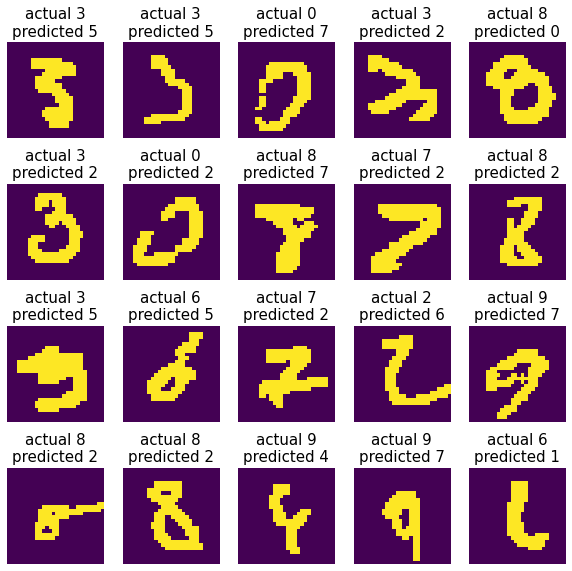

In [16]:
torch.manual_seed(1)

print("BatchNorm Model + L1 + L2")
kwargs['weight_decay'] = 1e-5
kwargs['lambda_l1'] = 0.0001
bn_l1_l2_output = fit(bn_model,  **kwargs)
plotWrongPredictions(getWrongPredictions(bn_model, device, test_loader))

torch.manual_seed(1)

print("LayerNorm Model + L2")
kwargs['weight_decay'] = 1e-5
kwargs['lambda_l1'] = None
ln_l2_output = fit(ln_model,  **kwargs)
plotWrongPredictions(getWrongPredictions(ln_model, device, test_loader))

torch.manual_seed(1)

print("GroupNorm Model + L1")
kwargs['weight_decay'] = 0
kwargs['lambda_l1'] = 0.0001
gn_l1_output = fit(gn_model,  **kwargs)
plotWrongPredictions(getWrongPredictions(gn_model, device, test_loader))

Text(0.5, 1.0, 'Test Accuracy')

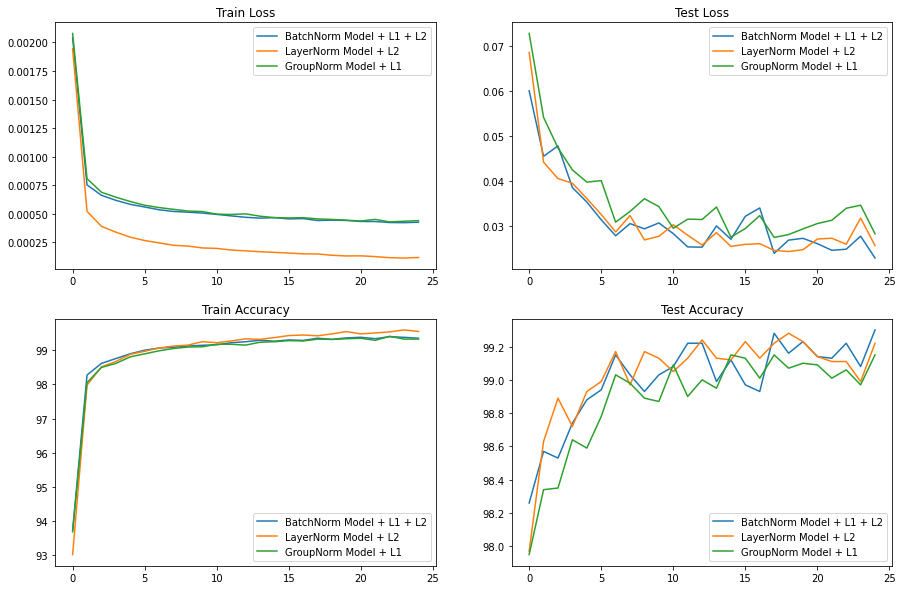

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

plt.subplot(2,2, 1)
plt.plot(bn_l1_l2_output[2])
plt.plot(ln_l2_output[2])
plt.plot(gn_l1_output[2])
plt.legend(["BatchNorm Model + L1 + L2", "LayerNorm Model + L2", "GroupNorm Model + L1"])
plt.title("Train Loss")

plt.subplot(2,2,2)
plt.plot(bn_l1_l2_output[3])
plt.plot(ln_l2_output[3])
plt.plot(gn_l1_output[3])
plt.legend(["BatchNorm Model + L1 + L2", "LayerNorm Model + L2", "GroupNorm Model + L1"])
plt.title("Test Loss")

plt.subplot(2,2,3)
plt.plot(np.array(bn_l1_l2_output[0]))
plt.plot(np.array(ln_l2_output[0]))
plt.plot(np.array(gn_l1_output[0]))
plt.legend(["BatchNorm Model + L1 + L2", "LayerNorm Model + L2", "GroupNorm Model + L1"])
plt.title("Train Accuracy")

plt.subplot(2,2,4)
plt.plot(np.array(bn_l1_l2_output[1]))
plt.plot(np.array(ln_l2_output[1]))
plt.plot(np.array(gn_l1_output[1]))
plt.legend(["BatchNorm Model + L1 + L2", "LayerNorm Model + L2", "GroupNorm Model + L1"])
plt.title("Test Accuracy")
